# Insepcting Data

This notebook demostrates how to inspect audio data using Librosa. This is a reproduced work of [Librosa Demo](https://nbviewer.jupyter.org/github/librosa/librosa/blob/master/examples/LibROSA%20demo.ipynb).

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as ms
ms.use('seaborn-muted')

# add IPython.display for audio output
import IPython.display

import librosa
import librosa.display


In [4]:
audio_path = '/data/nlpnd_projects/LibriSpeech/dev-clean/2428/83705/2428-83705-0000.wav'

y, sr = librosa.load(audio_path)

In [15]:
print('audio time series y- type: {}, shape={}'.format(type(y), y.shape))
print('sampling rate sr - type: {}, value={}'.format(type(sr), sr))

print('time duration: {} sec'.format(y.shape[0] / sr))

audio time series y- type: <class 'numpy.ndarray'>, shape=(84231,)
sampling rate sr - type: <class 'int'>, value=22050
time duration: 3.82 sec


### By default, librosa will resample the signal to 22050Hz. To disable resampling, set 'sr=None'

In [16]:
y, sr = librosa.load(audio_path, sr=None)

In [17]:
print('audio time series y- type: {}, shape={}'.format(type(y), y.shape))
print('sampling rate sr - type: {}, value={}'.format(type(sr), sr))

print('time duration: {} sec'.format(y.shape[0] / sr))

audio time series y- type: <class 'numpy.ndarray'>, shape=(61120,)
sampling rate sr - type: <class 'int'>, value=16000
time duration: 3.82 sec


# Play Audio

In [32]:
from IPython.display import Audio

Audio(audio_path)

# Mel spectrogram

In [64]:
# Mel-scaled power (engergy-squared)

S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)

In [65]:
print('Sampling rate= {}'.format(sr))
print('Mel spectrogram - type: {}, shape={}'.format(type(S), S.shape))
print('n_mels={}, t={}'.format(S.shape[0], S.shape[1]))

Sampling rate= 16000
Mel spectrogram - type: <class 'numpy.ndarray'>, shape=(128, 120)
n_mels=128, t=120


In [24]:
# Convert log scale (dB). We'll use the peak power (max) as a reference.
log_S = librosa.power_to_db(S, ref=np.max)

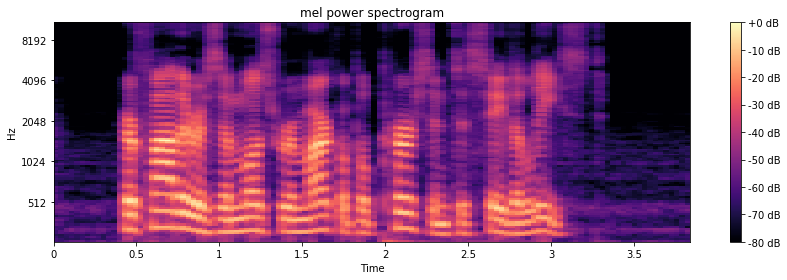

In [31]:
plt.figure(figsize=(12, 4))
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')
plt.title('mel power spectrogram')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

# MFCC

In [33]:
# extract the top-13 Mel-frequency cepstral coefficients (MFCCs)
mfcc = librosa.feature.mfcc(S=log_S, n_mfcc=13)

In [37]:
print('MFCC sequence - type: {}, shape: {}'.format(type(mfcc), mfcc.shape))

MFCC sequence - type: <class 'numpy.ndarray'>, shape: (13, 120)


In [38]:
# pad on first and second deltas
# order = 1 for first derivative. (Default)
#       = 2 for second deriative.
delta_mfcc = librosa.feature.delta(mfcc)
delta2_mfcc = librosa.feature.delta(mfcc, order=2)

In [40]:
print('delta matrix - type: {}, shape:{}'.format(type(delta_mfcc), delta_mfcc.shape))
print('delta matrix of 2nd derivative - type: {}, shape:{}'.format(type(delta2_mfcc), delta2_mfcc.shape))

delta matrix - type: <class 'numpy.ndarray'>, shape:(13, 120)
delta matrix of 2nd derivative - type: <class 'numpy.ndarray'>, shape:(13, 120)


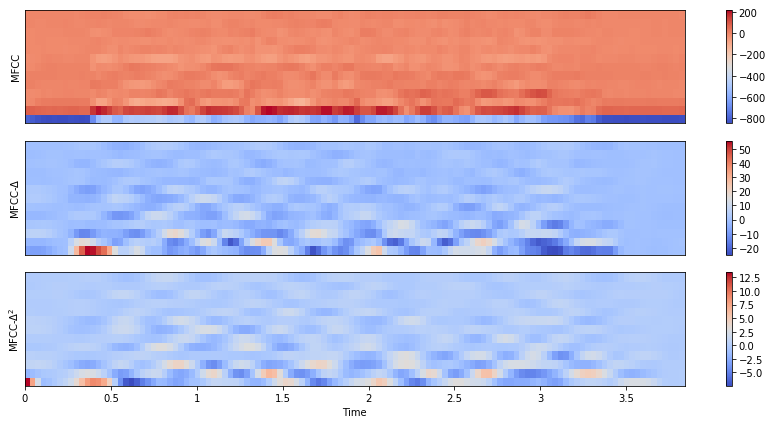

In [54]:
plt.figure(figsize=(12, 6))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc)
plt.ylabel('MFCC')
plt.colorbar()

plt.subplot(3, 1, 2)
librosa.display.specshow(delta_mfcc)
plt.ylabel('MFCC-$\Delta$')
plt.colorbar()

plt.subplot(3, 1, 3)
librosa.display.specshow(delta2_mfcc, sr=sr, x_axis='time')
plt.ylabel('MFCC-$\Delta^2$')
plt.colorbar()

plt.tight_layout()